In [169]:
using GLMakie
using Random
using Distributions
using Colors

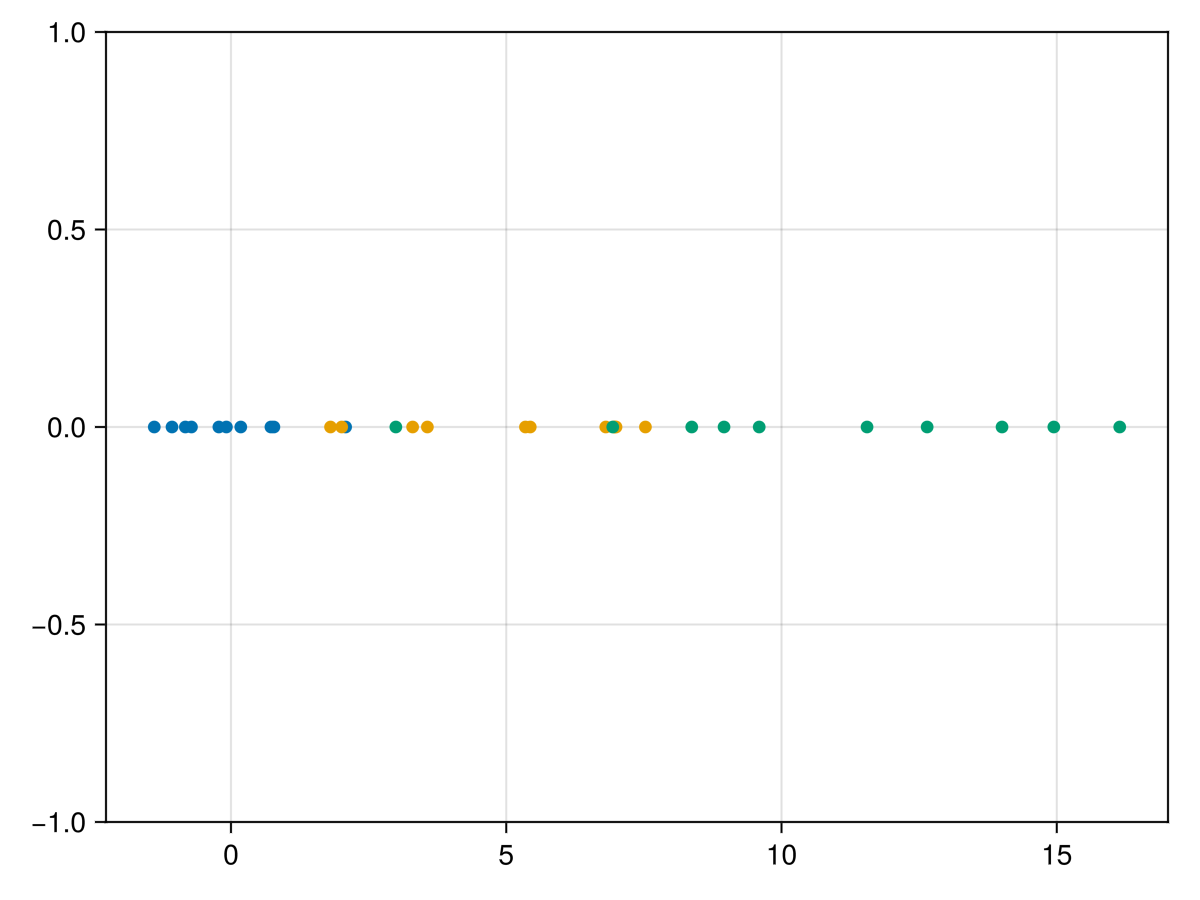

In [253]:
adist = Normal(0,1)
bdist = Normal(5,2)
cdist = Normal(10,3)

fig = Figure()
ax = Axis(fig[1,1])

n = 10

as = rand(adist, n)
bs = rand(bdist, n)
cs = rand(cdist, n)

non_as = vcat(bs,cs)
non_bs = vcat(as,cs)
non_cs = vcat(as,bs)

scatter!(as, zeros(n))
scatter!(bs, zeros(n))
scatter!(cs, zeros(n))

fig

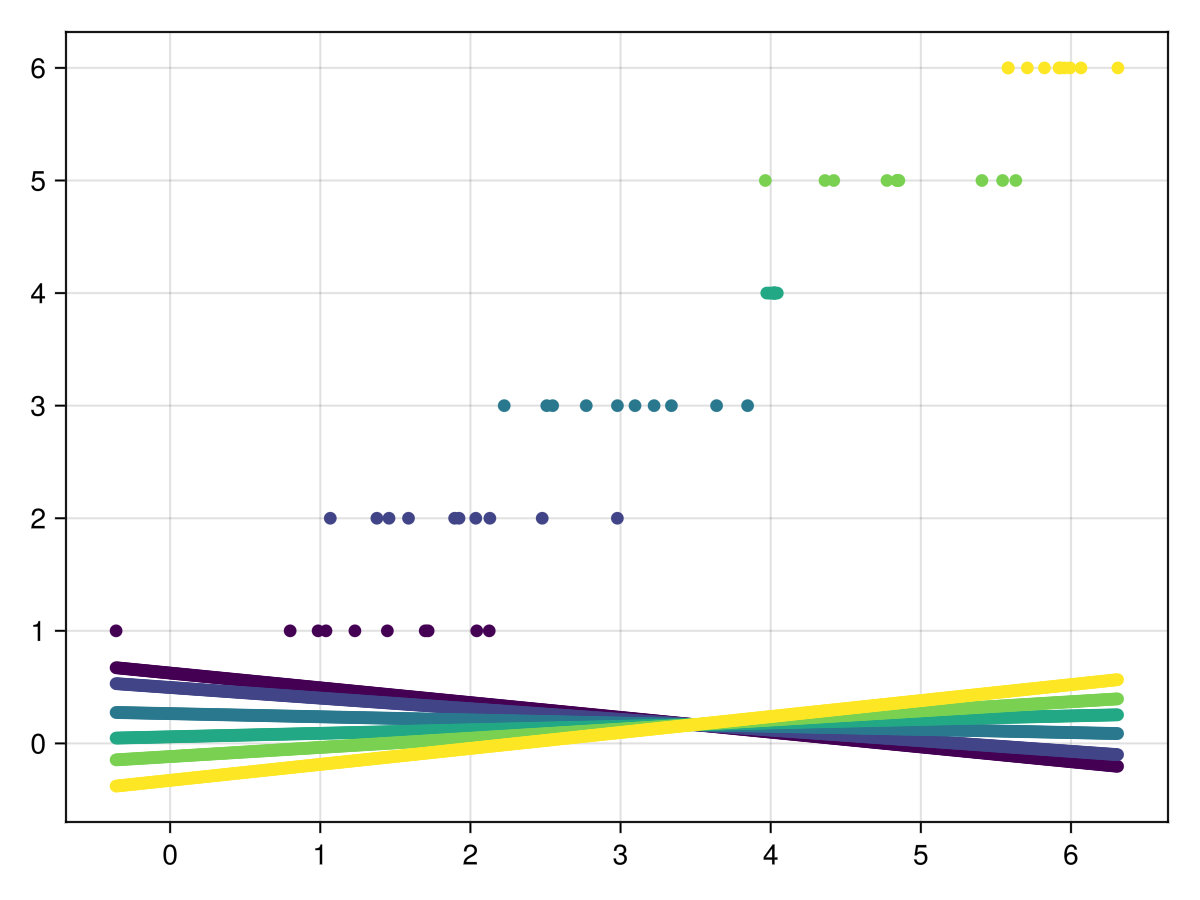

In [ ]:
function linreg_t(t, nt, N)
    A = hcat(ones(n*N), vcat(t, nt))
    y = vcat(ones(n), zeros((N-1)*n))
    v = A\y
    b, w = v
    return b, w
end

function display_linreg(t, nt)
    b, w = linreg_t(t, nt)
    xmin = minimum(vcat(t, nt))
    xmax = maximum(vcat(t, nt))
    x = xmin:0.01:xmax
    y = b .+ w .* x

    fig = Figure()
    ax = Axis(fig[1,1])
    scatter!(t, ones(n))
    scatter!(nt, zeros((N-1)*n))
    scatter!(x,y)

    return fig
end

function display_linregs(ts, nts, N)
    fig = Figure()
    ax = Axis(fig[1,1])
    cmap = cgrad(:viridis, length(ts), categorical=true)

    for (i, (t, nt)) in enumerate(collect(zip(ts, nts)))
        b,w = linreg_t(t, nt, N)
        xmin = minimum(vcat(t, nt))
        xmax = maximum(vcat(t, nt))
        x = xmin:0.01:xmax
        y = b .+ w .* x

        color = cmap[i]
        scatter!(x,y, color = color)
        scatter!(t, fill(i, n), color = color)
    end
    return fig
end

function quad_risk(t, nt)
    # wrong, taken with respect to all k
    b, w = linreg_t(t, nt)
    loss = sum((b .+ w .* t .- ones(n)).^2) + sum((b .+ w .* nt .- zeros(2*n)).^2)

    risk = loss / (N*n)
    return risk
end

ks = []
N = 6
for i in 1:N
    idist = Normal(i, rand())
    is = rand(idist, n)
    push!(ks, is)
end

non_ks = [ vcat(ks[1:i-1]..., ks[i+1:N]...) for i in 1:N]

fig5 = display_linregs(ks, non_ks, N)
# fig5 = display_linregs((as,bs,cs),(non_as,non_bs,non_cs))

$$v = [b_1, w_1, ..., b_N, w_N]$$
$$a(x) = b + w \cdot x$$
$$s(a_k(x)) = \frac{e^{a_k(x)}}{\sum e^{a(x)}}$$

In [ ]:
# fig1 = display_linreg(as, vcat(bs,cs))
# fig2 = display_linreg(bs, vcat(as,cs))
# fig3 = display_linreg(cs, vcat(as,bs))


# risk_a = quad_risk(as, non_as)
# risk_b = quad_risk(as, non_bs)
# risk_c = quad_risk(as, non_cs)

# fig4 = display_linregs((as,bs,cs),(non_as,non_bs,non_cs))

In [298]:
function hinge_risk(t, nt, b, w)
    n = length(t)
    N = div(length(nt), n) + 1

    ds = vcat(b .+ w .* t - ones(n), b .+ w .* nt - zeros((N-1)*n))
    loss = sum(exp.(ds))
    risk = loss / (N*n)
end

function s(v, k, t, nt)
    n = length(t)
    N = div(length(nt), n) + 1
    
    numer = hinge_risk(t, nt, v[2 * k - 1], v[2 * k])
    denom = sum(hinge_risk(t, nt, v[2 * i - 1], v[2 * i]) for i in 1:N)
    return numer / denom
end

b, w = linreg_t(as, non_as)
hinge_risk(as, non_as, b, w)
s([0,1,1,0,0.5,0.5],1,as,non_as)

v = []
for (k, non_k) in collect(zip(ks, non_ks))
    bk, wk = linreg_t(k, non_k, N)
    push!(v, bk, wk)
end

k=6
mysum = 0
for i in 1:N
    mysum += s(v, i, ks[k], non_ks[k])
    println(s(v, i, ks[k], non_ks[k]))
end
println(mysum)

0.17505828774922666
0.17078557229796557
0.1660605370470901
0.16328124089097787
0.16275726334105645
0.1620570986736833
1.0


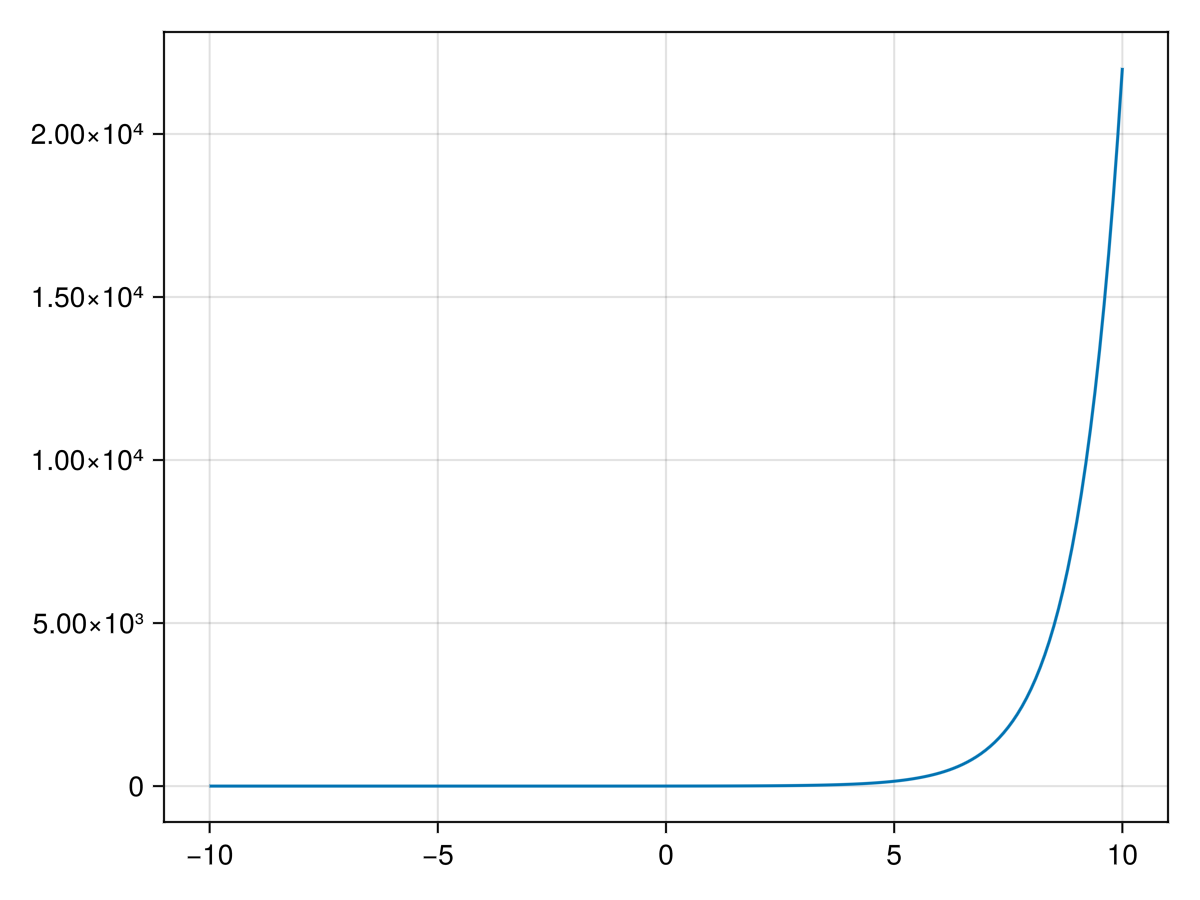

In [246]:
fig = Figure()
ax = Axis(fig[1,1])

x = -10:0.1:10
y = exp.(x)

lines!(x,y)
fig

expected:
$$\hat{y} = h(\textbf{x}) = \argmax_k p_k = \argmax_k s(a_k(\textbf{x})) = \argmax_k \frac{e^{a_k}}{\sum_{i = 1}^K e^{a_i}}$$
actual:
$$\hat{y} = h(\textbf{x}) \in \argmax_k(a_1(\textbf{x}), ..., a_K(\textbf{x}))$$

$$L(y, \textbf{p}) = \lambda(p_k) = -log(p_k) = -log(s(a_k(\textbf{x}))) = -log(\frac{e^{a_k}}{\sum_{i = 1}^K e^{a_i}})$$